In [1]:
# 랜덤 시드 설정
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [2]:
# 데이터 불러오기
from sklearn import datasets
raw_wine = datasets.load_wine()

In [4]:
# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

In [5]:
# 피쳐 데이터 차원 확인
print(X.shape)

(178, 13)


In [6]:
# 타겟 데이터 종류 확인
print(set(y))

{0, 1, 2}


In [7]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y) 
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [8]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, 
                                        random_state=0)

In [9]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

In [10]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
batch_normalization (BatchNo (None, 20)                80        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________


In [11]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [12]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
27/27 [==============================] - 1s 2ms/step - loss: 2.0335 - accuracy: 0.3937
Epoch 2/30
27/27 [==============================] - 0s 2ms/step - loss: 1.7389 - accuracy: 0.3261
Epoch 3/30
27/27 [==============================] - 0s 2ms/step - loss: 1.3710 - accuracy: 0.3772
Epoch 4/30
27/27 [==============================] - 0s 2ms/step - loss: 1.0671 - accuracy: 0.4106
Epoch 5/30
27/27 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.4771
Epoch 6/30
27/27 [==============================] - 0s 2ms/step - loss: 0.9315 - accuracy: 0.5169
Epoch 7/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.5764
Epoch 8/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7689 - accuracy: 0.6461
Epoch 9/30
27/27 [==============================] - 0s 2ms/step - loss: 0.8440 - accuracy: 0.5584
Epoch 10/30
27/27 [==============================] - 0s 2ms/step - loss: 0.7814 - accuracy: 0.5969
Epoch 11/30
27/27 [

In [13]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

5/5 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.7368
0.7368420958518982


In [14]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

2/2 [==============================] - 0s 5ms/step - loss: 0.6426 - accuracy: 0.7556
0.7555555701255798


In [16]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [17]:
accuracy = hist.history['accuracy'] 
print(accuracy)

[0.3458646535873413, 0.3834586441516876, 0.39849624037742615, 0.4436090290546417, 0.5263158082962036, 0.6015037298202515, 0.5639097690582275, 0.6240601539611816, 0.5939849615097046, 0.61654132604599, 0.6616541147232056, 0.6842105388641357, 0.6842105388641357, 0.6992481350898743, 0.7142857313156128, 0.7744361162185669, 0.7518796920776367, 0.7518796920776367, 0.7443609237670898, 0.7894737124443054, 0.7969924807548523, 0.7669172883033752, 0.8421052694320679, 0.8270676732063293, 0.8270676732063293, 0.8270676732063293, 0.8496240377426147, 0.8496240377426147, 0.8270676732063293, 0.8646616339683533]


In [18]:
loss = hist.history['loss'] 
print(loss)

[1.9797742366790771, 1.6155288219451904, 1.2918164730072021, 1.0279444456100464, 0.9091541171073914, 0.8727608323097229, 0.873351514339447, 0.7951136231422424, 0.8200011253356934, 0.7861722111701965, 0.7411396503448486, 0.7207075953483582, 0.7284011840820312, 0.7208655476570129, 0.6616853475570679, 0.6384433507919312, 0.6166789531707764, 0.6318159699440002, 0.704967200756073, 0.5679293870925903, 0.5816187262535095, 0.5675144195556641, 0.4875563979148865, 0.5761134028434753, 0.5063580870628357, 0.4814303517341614, 0.43181976675987244, 0.4628790616989136, 0.45662128925323486, 0.4377191960811615]


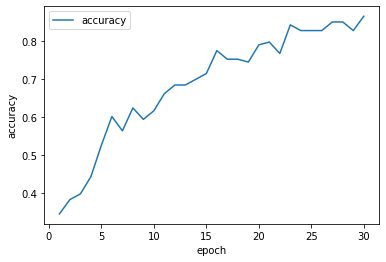

In [19]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

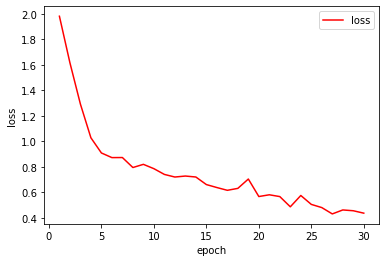

In [20]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

(178, 13)
{0, 1, 2}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                280       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
activation_2 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
_________________________________________________________________
activation_3 (Activation)    (None, 3)                 0         
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________________
Epoch 1/30
27/27 [==============================] - 1s 2ms/step - loss: 2.0335 - accuracy: 0.3937
Epo

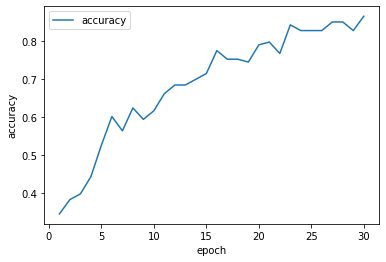

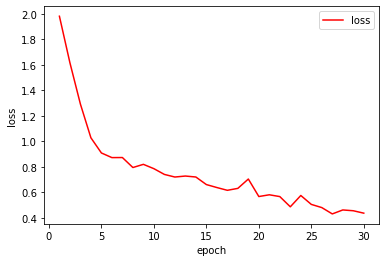

In [21]:
# 통합 코드
from sklearn import datasets
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation

import matplotlib.pyplot as plt

# 랜덤 시드 설정
np.random.seed(0)
tf.random.set_seed(0)

# 데이터 불러오기
raw_wine = datasets.load_wine()

# 피쳐, 타겟 데이터 지정
X = raw_wine.data
y = raw_wine.target

# 피쳐 데이터 차원 확인
print(X.shape)

# 타겟 데이터 종류 확인
print(set(y))

# 타겟 데이터 원-핫 인코딩
y_hot = to_categorical(y) 

# 트레이닝/테스트 데이터 분할
X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, 
                                        random_state=0)

# 신경망 생성
n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

# 신경망 모형 구조 확인
model.summary()

# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])


epoch = np.arange(1,epo+1)
accuracy = hist.history['accuracy'] 
loss = hist.history['loss'] 

# 정확도 학습 그래프
plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# 손실 그래프
plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()